In [1]:
## Export to html
#  jupyter nbconvert course_network.ipynb --no-input --to html
# 

import yaml, re, os, nbconvert, nbformat
import pandas as pd
import graphviz

main_dir=re.sub('code', '', os.getcwd())
data_dir=main_dir+'data/'
results_dir=main_dir+'results/'

with open(data_dir+'course_network.yaml') as file:
    course_in=yaml.safe_load(file)
    
# Using `pygraphviz` for exporting. To export:
# 1. jupyter nbconvert course_network.ipynb --no-input --to html
# ```
# <IMG SRC="/path/to/course_graph.svg" USEMAP="#my_graph" />
# ```

import pygraphviz as pgv
from IPython.display import Image

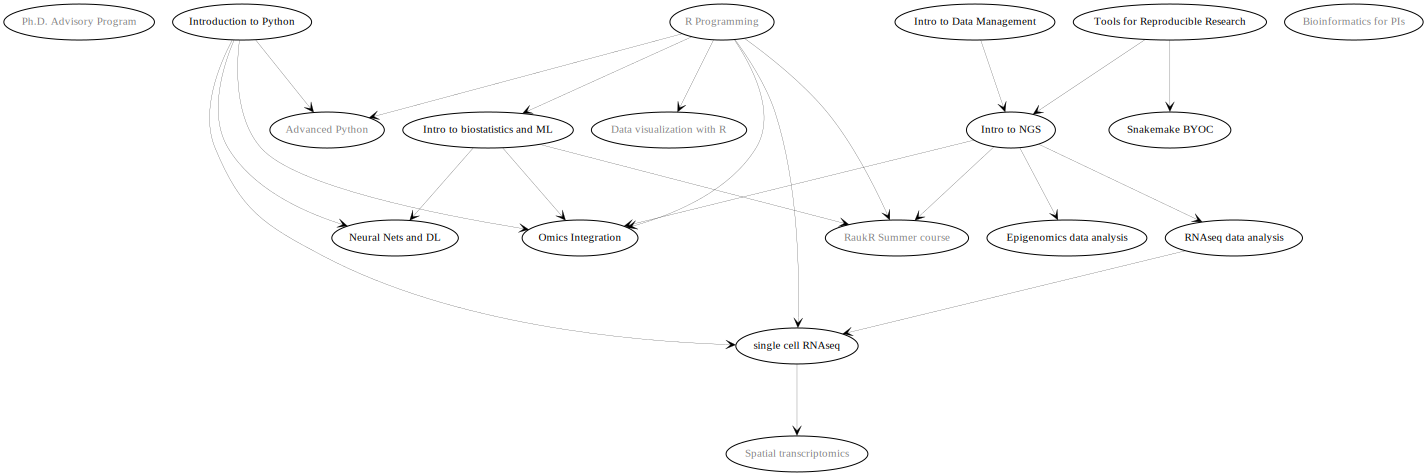

In [16]:
def course_graph2(course_dict_in, output_dir=results_dir, label_type='short',  font_size='11', fonttype='Arial', node_shape='ellipse'):
    """Draws a directed graph of course requirements. Same as above, but uses `graphviz` and , and exports the required files.

    
    Parameters:
    ===========
    course_dict_in (dict)            a dictionary built from the input yaml file.
    output_dir (str)                 output directory
    label_type (str)                 node label to show. One of `short` or `long`    
    """

    ## global network setup
    g = graphviz.Digraph('Workshop requirements')
    g.attr(rankdir='same', compound='true', ranksep = '1', labelloc="t")
    fonttype='Arial'
    node_shape='ellipse'
    label_type='short' #node label options: `short`, `long`
    g.node_attr["target"]="_blank"
    g.edge_attr["style"] = "setlinewidth(.2)"
    g.edge_attr['arrowhead']='vee'
    

    for course_key in course_in['courses']:
        c_att=course_in['courses'][course_key] #course attributes
        canvas_link=c_att['canvasLink']
        short_title=c_att['shortTitle']
        long_title=c_att['longTitle']
        prerequisites=c_att['prerequisites']
        bioschemas=c_att['bioschemas']        ## used for nothing for now

        if(label_type=='short'):
            label=short_title
            prereq_type='shortTitle'
        elif(label_type=='long'):
            label=long_title
            prereq_type='longTitle'
        else:
            raise AttributeError('`label` should be one of `short` or `long`.')

        # if canvas url is absent show as gray
        if(canvas_link==""):
            color='gray'
#             fsize='9'
        else:
            color='black'

        # create nodes
        g.node(label, shape=node_shape, 
               fontcolor=color, 
               fontsize=font_size, 
               fontstyle=fonttype,
               href=canvas_link)
        
        ## Force "Intro to Python" to go to top
        if(course_key=='intro_python'):
            g.edge('Introduction to Python','Intro to biostatistics and ML', style='invis') 

        # create edges
        if(prerequisites!=[]):
            for prerequisite_i in prerequisites:
                prereq_name=course_in['courses'][prerequisite_i][prereq_type]
                g.edge(prereq_name, label)
                
    return(g)

course_graph2(course_in, results_dir)

In [ ]:

def DEPRECATEDcourse_graph(course_dict_in, output_dir=results_dir, label_type='short',  fontsize='11', fonttype='Arial', node_shape='ellipse'):
    """Draws a directed graph of course requirements, and exports the required files. DOES NOT INCLUDE HYPERLINKS
    
    Parameters:
    ===========
    course_dict_in (dict)            a dictionary built from the input yaml file.
    output_dir (str)                 output directory
    label_type (str)                 node label to show. One of `short` or `long`    
    """

    ## global network setup
    g = pgv.AGraph(directed=True, strict=True)

    fontsize='11'
    fonttype='Arial'
    node_shape='ellipse'
    label_type='short' #node label options: `short`, `long`
    g.edge_attr["style"] = "setlinewidth(.2)"
    g.edge_attr['arrowhead']='vee'

    for course_key in course_in['courses']:
        c_att=course_dict_in['courses'][course_key] #course attributes
        canvas_link=c_att['canvasLink']
        short_title=c_att['shortTitle']
        long_title=c_att['longTitle']
        prerequisites=c_att['prerequisites']
        bioschemas=c_att['bioschemas']        ## used for nothing for now

        if(label_type=='short'):
            label=short_title
            prereq_type='shortTitle'
        elif(label_type=='long'):
            label=long_title
            prereq_type='longTitle'
        else:
            raise AttributeError('`label` should be one of `short` or `long`.')

        # if canvas url is absent show as gray
        if(canvas_link==""):
            color='gray'
            fontsize='9'
        else:
            color='black'

        # create nodes
        g.add_node(
            label,
            label=label,
            shape=node_shape, 
            fontcolor=color, 
            fontsize=fontsize, 
            fontstyle=fonttype,
            URL=canvas_link
        )

        # add edges
        if(prerequisites!=[]):
            for prerequisite_i in prerequisites:
                prereq_name=course_dict_in['courses'][prerequisite_i][prereq_type]
                g.add_edge(prereq_name, label)

    #output
    g.layout(prog="dot") 
    g.draw(output_dir+'course_graph.svg', format='svg')
    g.draw(output_dir+'course_graph.map', format='cmapx')
    g.draw(output_dir+'course_graph.png')
        
    return(Image(results_dir+'course_graph.png'))
# course_graph(course_in, results_dir)